# ROC

A few graphs about ROC on the iris datasets.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

## Iris datasets

In [3]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

In [4]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [5]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression()
clf.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [6]:
import numpy

ypred = clf.predict(X_test)
yprob = clf.predict_proba(X_test)
score = numpy.array(list(yprob[i, ypred[i]] for i in range(len(ypred))))

In [7]:
data = numpy.zeros((len(ypred), 2))
data[:, 0] = score.ravel()
data[ypred == y_test, 1] = 1
data[:5]

array([[ 0.70495209,  1.        ],
       [ 0.56148737,  0.        ],
       [ 0.56148737,  1.        ],
       [ 0.77416227,  1.        ],
       [ 0.58631799,  0.        ]])

## ROC with scikit-learn

We use the following example [Receiver Operating Characteristic (ROC)](http://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html#sphx-glr-auto-examples-model-selection-plot-roc-py).

In [8]:
from sklearn.metrics import roc_curve

fpr, tpr, th = roc_curve(y_test == ypred, score)

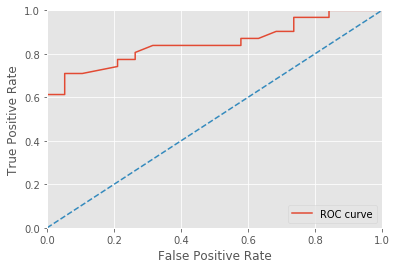

In [9]:
plt.plot(fpr, tpr, label="ROC curve")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

In [10]:
import pandas

df = pandas.DataFrame(dict(fpr=fpr, tpr=tpr, threshold=th))
df

,fpr,threshold,tpr
0,0.000000,0.910712,0.032258
1,0.000000,0.869794,0.096774
2,0.000000,0.863174,0.161290
3,0.000000,0.805864,0.258065
4,0.000000,0.790909,0.387097
5,0.000000,0.650510,0.612903
6,0.052632,0.634499,0.612903
7,0.052632,0.620319,0.709677
8,0.105263,0.615015,0.709677
9,0.210526,0.607975,0.741935


## ROC - TPR / FPR

We do the same with the class this module provides [ROC](https://sdpython.github.io/doc/mlstatpy/dev/c_metric/roc.html).

* TPR = True Positive Rate
* FPR = False Positive Rate

You can see as TPR the distribution function of a score for a positive example and the FPR the same for a negative example.

In [11]:
from mlstatpy.ml.roc import ROC

In [12]:
roc = ROC(df=data)

In [13]:
roc

Overall precision: 0.63 - AUC=0.850594
--------------
      score  label  weight
0  0.375573    0.0     1.0
1  0.385480    0.0     1.0
2  0.412314    0.0     1.0
3  0.412703    1.0     1.0
4  0.417941    0.0     1.0
--------------
       score  label  weight
45  0.863174    1.0     1.0
46  0.863174    1.0     1.0
47  0.869794    1.0     1.0
48  0.903335    1.0     1.0
49  0.910712    1.0     1.0
--------------
    False Positive Rate  True Positive Rate  threshold
0              0.000000            0.032258   0.910712
1              0.000000            0.193548   0.828617
2              0.000000            0.354839   0.790909
3              0.000000            0.516129   0.737000
4              0.052632            0.645161   0.627589
5              0.157895            0.741935   0.607975
6              0.263158            0.838710   0.561487
7              0.526316            0.838710   0.542211
8              0.684211            0.903226   0.520835
9              0.842105            0

In [14]:
roc.auc()

0.85059422750424452

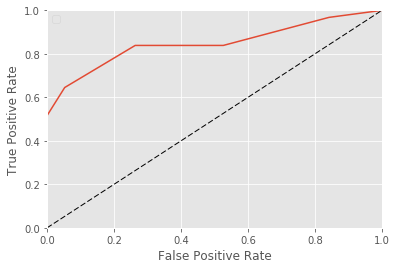

In [15]:
roc.plot(nb=10)

This function draws the curve with only 10 points but we can ask for more.

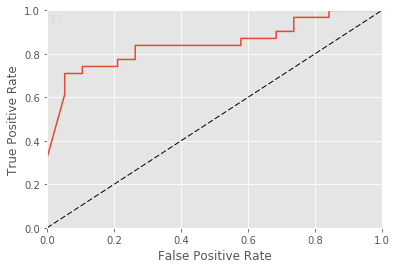

In [16]:
roc.plot(nb=100)

We can also ask to draw bootstropped curves to get a sense of the confidence.

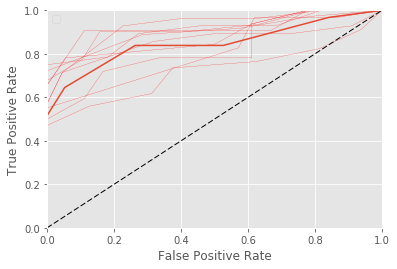

In [17]:
roc.plot(nb=10, bootstrap=10)

## ROC - score distribution

This another representation for the metrics FPR and TPR. $P(x<s)$ is the probability that a score for a positive example to be less than $s$. $P(->s)$ is the probability that a score for a negative example to be higher than $s$. We assume in this case that the higher the better for the score.

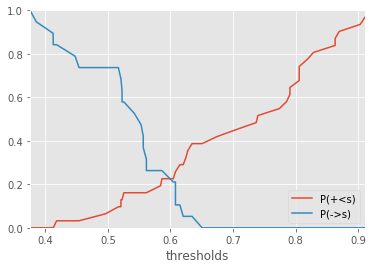

In [18]:
roc.plot(curve=ROC.CurveType.PROBSCORE, thresholds=True)

When curves intersects at score $s^*$, error rates for positive and negative examples are equal. If we show the confusion matrix for this particular score $s^*$, it gives:

In [19]:
conf = roc.confusion()
conf["P(+<s)"] = 1 - conf["True Positive"] / conf.loc[len(conf) - 1, "True Positive"]
conf["P(->s)"] = 1 - conf["True Negative"] / conf.loc[0, "True Negative"]
conf

,True Positive,False Positive,False Negative,True Negative,threshold,P(+<s),P(->s)
0,0.0,0.0,31.0,19.0,0.910712,1.000000,0.000000
1,1.0,0.0,30.0,19.0,0.910712,0.967742,0.000000
2,6.0,0.0,25.0,19.0,0.828617,0.806452,0.000000
3,11.0,0.0,20.0,19.0,0.790909,0.645161,0.000000
4,16.0,0.0,15.0,19.0,0.737000,0.483871,0.000000
5,20.0,1.0,11.0,18.0,0.627589,0.354839,0.052632
6,23.0,3.0,8.0,16.0,0.607975,0.258065,0.157895
7,26.0,5.0,5.0,14.0,0.561487,0.161290,0.263158
8,26.0,10.0,5.0,9.0,0.542211,0.161290,0.526316
9,28.0,13.0,3.0,6.0,0.520835,0.096774,0.684211


## ROC - recall / precision

In this representation, we show the score.

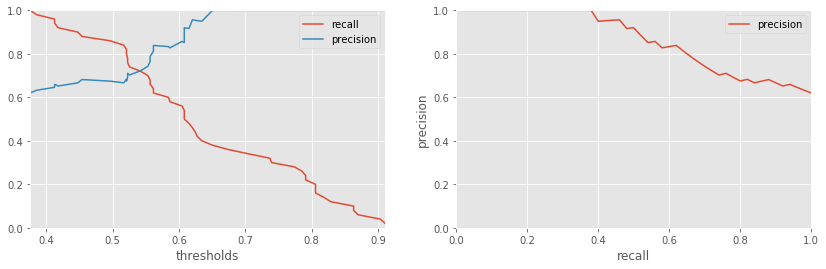

In [20]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(14, 4))
roc.plot(curve=ROC.CurveType.RECPREC, thresholds=True, ax=axes[0])
roc.plot(curve=ROC.CurveType.RECPREC, ax=axes[1])